# Part 2a - What are the best times and days of the week to minimise delays each year?

In [2]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading and joining the year csv to create one large dataframe
df = pd.concat([pd.read_csv(f"dataset/{year}.csv", encoding='latin-1') for year in range(1995,2005)])

/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_96650/3445128161.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f"dataset/{year}.csv", encoding='latin-1') for year in range(1995,2005)])


### Pre-processing

In [5]:
#filtering for columns of interest
delays_data = df[['Year','DayOfWeek','CRSDepTime','DepTime','DepDelay','CRSArrTime','ArrTime','ArrDelay']]
delays_data.head()

,Year,DayOfWeek,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay
0,1995,5,645,657.0,12.0,937,952.0,15.0
1,1995,6,645,648.0,3.0,937,938.0,1.0
2,1995,7,645,649.0,4.0,937,932.0,-5.0
3,1995,1,645,645.0,0.0,937,928.0,-9.0
4,1995,2,645,645.0,0.0,937,931.0,-6.0


In [6]:
delays_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57543862 entries, 0 to 7129269
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Year        int64  
 1   DayOfWeek   int64  
 2   CRSDepTime  int64  
 3   DepTime     float64
 4   DepDelay    float64
 5   CRSArrTime  int64  
 6   ArrTime     float64
 7   ArrDelay    float64
dtypes: float64(4), int64(4)
memory usage: 3.9 GB


In [7]:
# Missing values
delays_data.isna().sum()

Year                0
DayOfWeek           0
CRSDepTime          0
DepTime       1330081
DepDelay      1330081
CRSArrTime          0
ArrTime       1454175
ArrDelay      1454176
dtype: int64

In [8]:
# The number of cancelled flights
df['Cancelled'].sum()

1330081

In [9]:
# The number of both cancelled and diverted flights
df['Diverted'].sum() + df['Cancelled'].sum()

1454175

In [10]:
# Removing missing values
delays_data = delays_data.dropna()
delays_data.isna().sum()

Year          0
DayOfWeek     0
CRSDepTime    0
DepTime       0
DepDelay      0
CRSArrTime    0
ArrTime       0
ArrDelay      0
dtype: int64

In [11]:
delays_data.loc[delays_data['ArrDelay']<0, 'ArrDelay'] = 0

### Best Days of The Week to Minimise Delays by Year

In [13]:
#subset for question 1
data = delays_data[['Year','DayOfWeek','ArrDelay']]

In [14]:
def calculate_min_values(matrix):
    mat = []
    for j in range(matrix.shape[1]):
        m=[]
        for i in range(matrix.shape[0]):
            if matrix.iloc[i,j] == matrix.iloc[:,j].min():
                m.append(True)
            else:
                m.append(False)
        mat.append(m)
    return np.array(mat).transpose()

In [15]:
data = data.groupby(['Year','DayOfWeek']).mean().reset_index()
data = data.pivot(index='DayOfWeek',columns='Year')
mask = calculate_min_values(data)
data

ArrDelay                                                         \
Year            1995       1996       1997       1998       1999       2000   
DayOfWeek                                                                     
1           9.507991  12.316648   9.764454  11.589720  12.338938  13.466577   
2           9.881556  12.232803   9.322978  11.696908  11.026250  12.081573   
3          11.302825  12.676572  11.360403  11.653458  12.139320  13.712673   
4          11.520938  14.372812  12.540773  13.343302  13.818690  16.888652   
5          11.873178  15.673397  13.800156  13.926873  15.198203  19.008543   
6           9.294407  10.674093   9.681899   8.902080  10.702917  11.714103   
7           9.621566  11.569764  11.150429  11.501577  12.496333  15.602150   

                                                       
Year            2001       2002       2003       2004  
DayOfWeek                                              
1           9.971993   9.506503   9.778948  12.986001  
2           9.317784   8.780369   8.600259  11.128452  
3          10.172902   8.737409   9.048981  12.158744  
4          12.474929  10.448919  10.517449  12.927085  
5          13.873555  10.843317  10.834579  12.851730  
6           9.920861   7.236553   7.373219   9.090770  
7          11.071462   8.947287   9.984601  11.946222

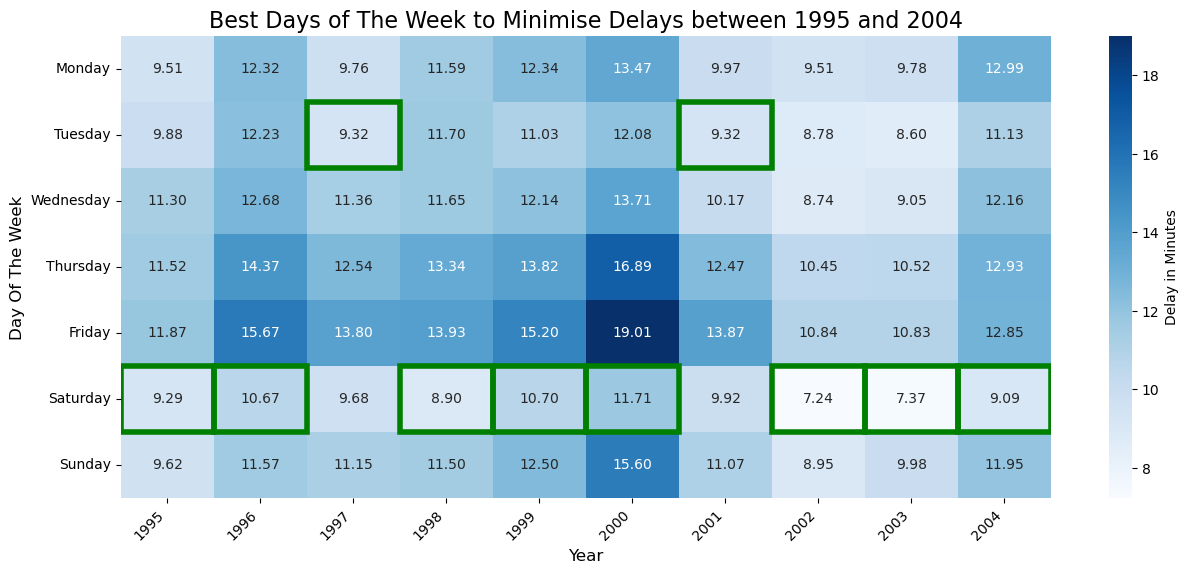

In [21]:
plt.figure(figsize=(15, 6))
hmap = sns.heatmap(data, annot=True, fmt='.2f',cmap="Blues",cbar=True,cbar_kws={'label': 'Delay in Minutes'})

for j in range(data.shape[1]):
    for i in range(data.shape[0]):
        if mask[i, j]:
            hmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='green', lw=4))
            
plt.title('Best Days of The Week to Minimise Delays between 1995 and 2004',fontsize=16)
plt.ylabel('Day Of The Week',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.yticks(ticks=np.arange(0.5,7.5,1),labels=['Monday','Tuesday','Wednesday','Thursday'
                                              ,'Friday','Saturday','Sunday'], rotation=360, ha='right')
plt.xticks(ticks=np.arange(0.5,10.5,1), labels=np.arange(1995,2005,1),rotation=45, ha='right')
plt.show()

### Best Times to Minimise Delays by Year

In [23]:
def TimeOfDay(times):
    ToD = []
    for time in times:
        if time <= 400:
            ToD.append('Late Night')
        elif time <= 800:
            ToD.append('Early Morning')
        elif time <= 1200:
            ToD.append('Late Morning')
        elif time <= 1500:
            ToD.append('Early Afternoon')
        elif time <= 1800:
            ToD.append('Late Afternoon')
        elif time <= 2100:
            ToD.append('Early Evening')
        elif time <=2400:
            ToD.append('Late Evening')
        else:
            ToD.append(None)
    return ToD

In [25]:
data = delays_data[['Year','ArrDelay']]
data['TimeOfDay'] = TimeOfDay(delays_data['CRSDepTime'])

data = data.groupby(['Year','TimeOfDay']).mean().reset_index()
data = data.pivot(index='TimeOfDay',columns='Year')
data = data.loc[['Late Night','Early Morning','Late Morning','Early Afternoon',
                 'Late Afternoon','Early Evening','Late Evening']]
mask = calculate_min_values(data)
data

/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_96650/3201754377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TimeOfDay'] = TimeOfDay(delays_data['CRSDepTime'])


ArrDelay                                              \
Year                  1995       1996       1997       1998       1999   
TimeOfDay                                                                
Late Night       14.150289  15.663026  13.421174  10.229022  12.497164   
Early Morning     5.890136   7.336447   6.575015   6.618759   6.528460   
Late Morning      8.347846  10.119456   8.750075   9.188285   9.376768   
Early Afternoon  10.138044  12.254945  10.675946  11.375284  12.500683   
Late Afternoon   12.542801  15.555139  13.605849  14.968612  16.633338   
Early Evening    14.221070  17.824144  15.254170  16.989547  17.681503   
Late Evening     12.463625  15.660597  12.897279  14.082882  14.368165   

                                                                        
Year                  2000       2001       2002       2003       2004  
TimeOfDay                                                               
Late Night       13.060439   9.808887   5.572885   5.372224   7.929721  
Early Morning     7.545932   6.257184   5.251365   5.627965   6.437837  
Late Morning     11.049008   8.627570   7.068040   7.152921   8.556162  
Early Afternoon  14.604380  11.159395   9.179943   9.457734  11.650141  
Late Afternoon   19.257813  14.048848  12.112413  12.507850  15.917553  
Early Evening    20.646110  15.026165  12.969433  12.903579  17.371389  
Late Evening     17.633204  12.123328   9.983068  10.163948  13.724296

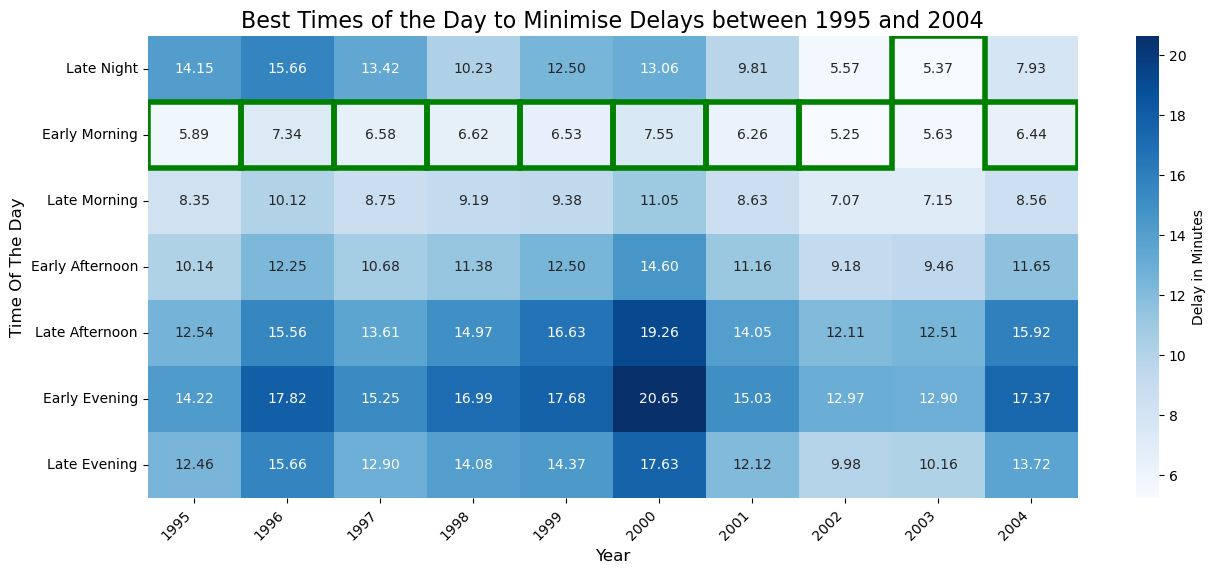

In [29]:
plt.figure(figsize=(15, 6))
hmap = sns.heatmap(data, annot=True, fmt='.2f',cmap="Blues",cbar=True,cbar_kws={'label': 'Delay in Minutes'})

for j in range(data.shape[1]):
    for i in range(data.shape[0]):
        if mask[i, j]:
            hmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='green', lw=4))
            
plt.title('Best Times of the Day to Minimise Delays between 1995 and 2004',fontsize=16)
plt.ylabel('Time Of The Day',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.xticks(ticks=np.arange(0.5,10.5,1), labels=np.arange(1995,2005,1),rotation=45, ha='right')
plt.show()